# 3. Visualization Editing

The purpose of this notebook is edit some of the visuals to make them more publication quality. To see the process of making the visualizations, that is in notebook 2

## 1. Library Import

In [25]:
''' FILE ACCESS '''

import json
import os
import glob
import smart_open
import csv

''' DATA QUERYING '''

import regex as re
import pandas as pd
import datetime
import datetime
from datetime import datetime
from dateutil.parser import parse

''' TEXT PROCESSING '''
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
import regex as re

''' SENTIMENT ANALYSIS '''

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()



''' DATA VISUALIZATION '''

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sb

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\natal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def sentiment_symbol(score):
    if score > 0.1:
        return "+"
    elif score < -0.1:
        return "-"
    else:
        return "o"

## 2. Visualizations:

## 2.1 Positive or Negative Cliamte Posts
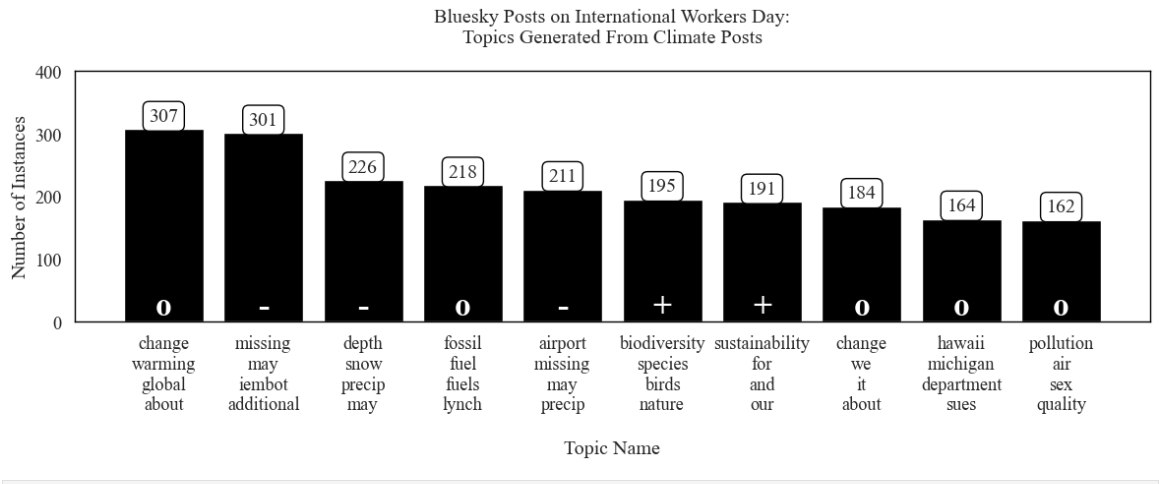

In [4]:
climate_topic_sentiments = pd.read_csv("Climate Topic Frequencies with Sentiment.csv")

In [5]:
climate_topic_sentiments.head()

,Unnamed: 0,Topic,Name,Avg. Compound Sentiment,level_0,index,count,Percentage,Topic Name Clean
0,0,0,0_airport_missing_may_precip,-0.463966,4,4,211,0.027460,airport\nmissing\nmay\nprecip
1,1,1,1_biodiversity_species_birds_nature,0.158269,5,5,195,0.025377,biodiversity\nspecies\nbirds\nnature
2,2,2,2_fossils_fossilized_fossil_old,0.094045,10,10,154,0.020042,fossils\nfossilized\nfossil\nold
3,3,3,3_hawaii_michigan_department_sues,-0.014320,8,8,164,0.021343,hawaii\nmichigan\ndepartment\nsues
4,4,4,4_election_australia_auspol_coalition,0.055649,11,11,153,0.019912,election\naustralia\nauspol\ncoalition


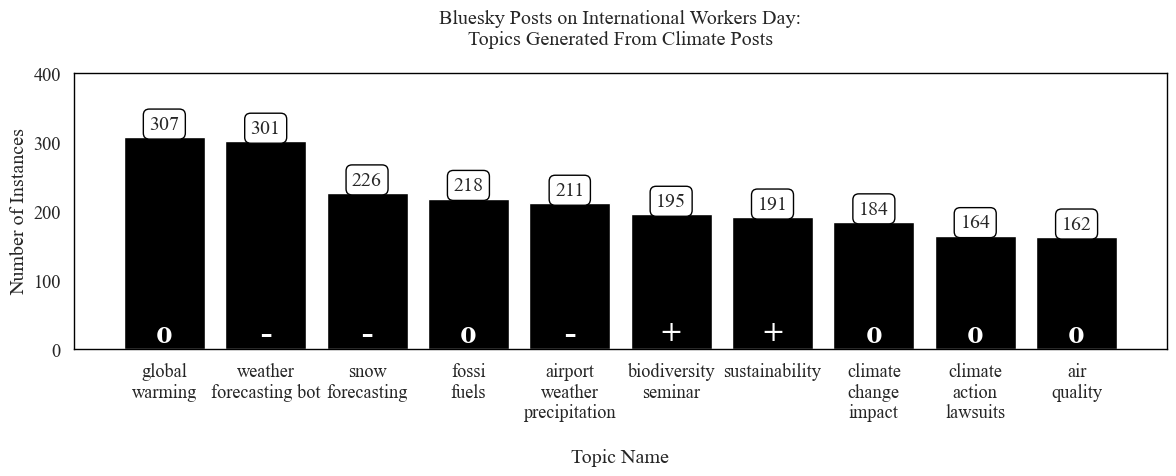

In [12]:
climate_freq_plotting = climate_topic_sentiments.sort_values(by='count', ascending=False)[0:10]
climate_freq_plotting['New Name'] = ['global\nwarming', 'weather\nforecasting bot','snow\nforecasting','fossi\nfuels','airport\nweather\nprecipitation','biodiversity\nseminar','sustainability','climate\nchange\nimpact','climate\naction\nlawsuits','air\nquality']

sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)

fig, ax = plt.subplots(figsize=(12,5))

hist = sb.barplot(data=climate_freq_plotting, x="New Name", y="count", color="black", ax=ax)

for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )


for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

hist.set_title("Bluesky Posts on International Workers Day:\nTopics Generated From Climate Posts\n")
hist.set_xlabel("\nTopic Name")
hist.set_ylabel("Number of Instances")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
ax.set_ylim(0, 400)

bars = hist.patches  # list of matplotlib Rectangle objects for each bar

for bar, (_, row) in zip(bars, climate_freq_plotting.iterrows()):
    x = bar.get_x() + bar.get_width() / 2  # center of the bar
    y = bar.get_height()

    ax.text(
        x,
        0,  # adjust vertical position above bar
        sentiment_symbol(row['Avg. Compound Sentiment']),
        ha='center',
        va='bottom',
        fontsize=24,
        fontweight='bold',
        color='white'
    )

# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("Topic Model - Climate Posts - Most Frequent Topics - With Sentiment - Cleaned Names.png",dpi=500)
plt.show();

### 2.2 Labor Posts Only
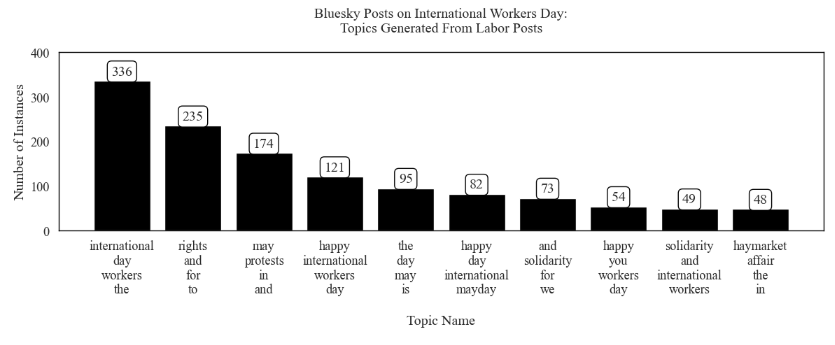

In [23]:
labor_topic_sentiments = pd.read_csv(r"C:\Users\natal\OneDrive\university\research\labor day\Labor Topic Frequencies with Sentiment.csv")

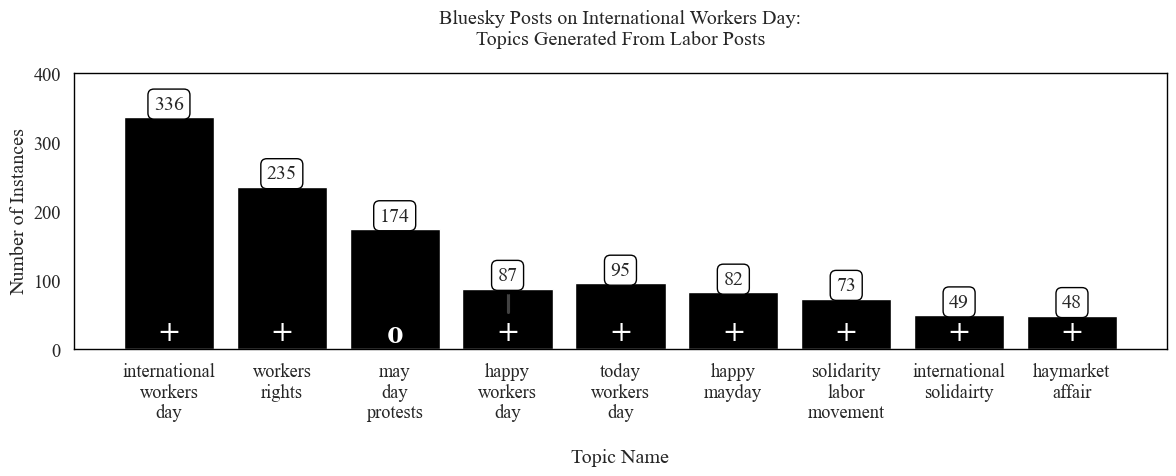

In [24]:
labor_freq_plotting = labor_topic_sentiments.sort_values(by='count', ascending=False)[0:10]
labor_freq_plotting['New Name'] = ['international\nworkers\nday', 'workers\nrights','may\nday\nprotests','happy\nworkers\nday','today\nworkers\nday','happy\nmayday','solidarity\nlabor\nmovement','happy\nworkers\nday','international\nsolidairty','haymarket\naffair']

sb.set_style("white")
sb.set(font='Times New Roman', font_scale=1.2)

fig, ax = plt.subplots(figsize=(12,5))

hist = sb.barplot(data=labor_freq_plotting, x="New Name", y="count", color="black", ax=ax)

for bar_group in hist.containers:  # `containers` contains the histogram bars grouped by hue
    # Get heights and centers for each group
    heights = [bar.get_height() for bar in bar_group]
    centers = [bar.get_x() + bar.get_width() / 2 for bar in bar_group]
    
    # Add markers
    plt.scatter(centers, heights, color='black', zorder=3)
    
    for center, height in zip(centers, heights):
        plt.text(
            center, 
            height, 
            f'{int(height):,}',  # Format with commas
            color='black', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )


for container in hist.containers:
    hist.bar_label(container, fmt='%d', label_type='edge', padding=3, bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

hist.set_title("Bluesky Posts on International Workers Day:\nTopics Generated From Labor Posts\n")
hist.set_xlabel("\nTopic Name")
hist.set_ylabel("Number of Instances")
ax.tick_params(axis='x')
ax.grid(True)
ax.set_facecolor("white")

formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)
ax.set_ylim(0, 400)

bars = hist.patches  # list of matplotlib Rectangle objects for each bar

for bar, (_, row) in zip(bars, labor_freq_plotting.iterrows()):
    x = bar.get_x() + bar.get_width() / 2  # center of the bar
    y = bar.get_height()

    ax.text(
        x,
        0,  # adjust vertical position above bar
        sentiment_symbol(row['Avg. Compound Sentiment']),
        ha='center',
        va='bottom',
        fontsize=24,
        fontweight='bold',
        color='white'
    )

# Set the border (box) around the entire plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set the color of the border to black
    spine.set_linewidth(1)  # Set the width of the border

plt.tight_layout()
plt.savefig("Topic Model - Labor Posts - Most Frequent Topics - With Sentiment - clean names.png",dpi=500)
plt.show();

## 2.3 Generating Some Examples for Positive and Negative Sentiment

In [26]:
def compound_sentiment(post):
    sentiments = sia.polarity_scores(post)
    compound_sentiment = sentiments['compound']

    return (compound_sentiment)

In [27]:
posts = pd.read_csv(r"C:\Users\natal\OneDrive\university\research\labor day\Labeled Sample Data.csv")

In [33]:
post_list = posts['text'].to_list()

sample_posts = post_list[20:40]

In [ ]:
for post in sample_posts:
    print ("--------------------------------\n")
    print (f'{post}')

    sentiment = compound_sentiment(post)
    print (f'\tCOMPOUND SENTIMENT: {sentiment}')

### 2.4 Understanding the percentage of posts that belong to a positive, negative, or neutral topic.

In [35]:
climate_data = pd.read_csv(r"C:\Users\natal\OneDrive\university\research\labor day\Climate Topic Frequencies with Sentiment.csv")

In [45]:
labor_data = pd.read_csv(r"C:\Users\natal\OneDrive\university\research\labor day\Labor Topic Frequencies with Sentiment.csv")

In [42]:
climate_data.head()

,Unnamed: 0,Topic,Name,Avg. Compound Sentiment,level_0,index,count,Percentage,Topic Name Clean,Sentiment Label
0,0,0,0_airport_missing_may_precip,-0.463966,4,4,211,0.027460,airport\nmissing\nmay\nprecip,Negative
1,1,1,1_biodiversity_species_birds_nature,0.158269,5,5,195,0.025377,biodiversity\nspecies\nbirds\nnature,Positive
2,2,2,2_fossils_fossilized_fossil_old,0.094045,10,10,154,0.020042,fossils\nfossilized\nfossil\nold,Neutral
3,3,3,3_hawaii_michigan_department_sues,-0.014320,8,8,164,0.021343,hawaii\nmichigan\ndepartment\nsues,Neutral
4,4,4,4_election_australia_auspol_coalition,0.055649,11,11,153,0.019912,election\naustralia\nauspol\ncoalition,Neutral


In [39]:
def sentiment_labeler(score):
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

In [41]:
climate_data['Sentiment Label'] = climate_data['Avg. Compound Sentiment'].apply(lambda x: sentiment_labeler(x))

In [43]:
climate_data['Sentiment Label'].value_counts()

Sentiment Label
Negative    47
Positive    45
Neutral     39
Name: count, dtype: int64

In [44]:
total_topics = len(climate_data)

print (f"The total number of topics for the climate dataset are {total_topics}")

The total number of topics for the climate dataset are 131


In [46]:
labor_data['Sentiment Label'] = labor_data['Avg. Compound Sentiment'].apply(lambda x: sentiment_labeler(x))

In [48]:
labor_data['Sentiment Label'].value_counts()

Sentiment Label
Positive    24
Neutral      5
Negative     1
Name: count, dtype: int64

In [49]:
total_topics = len(labor_data)

print (f"The total number of topics for the labor dataset are {total_topics}")

The total number of topics for the labor dataset are 30


### 2.5 Generating Wordclouds for each of the corpora

In [55]:
c_posts = climate_posts['clean text'].to_list()
l_posts = labor_posts['clean text'].to_list()

In [50]:
climate_posts = pd.read_csv(r"C:\Users\natal\OneDrive\university\research\labor day\Sample of Climate Only.csv")
labor_posts = pd.read_csv(r"C:\Users\natal\OneDrive\university\research\labor day\Sample of Labor Only.csv")

In [57]:
''' SOURCE: GEEKS FOR GEEKS GENERATING WORD CLOUD PYTHON '''

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in c_posts:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "



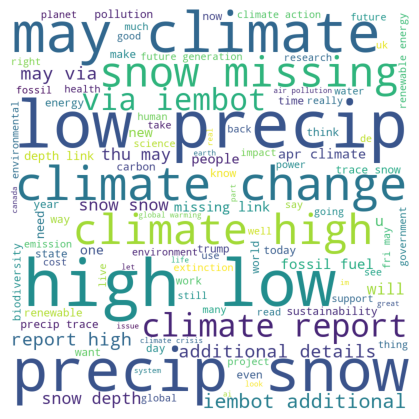

In [59]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

plt.savefig('Corpus Posts - Climate.png',dpi=500)
plt.show()

In [60]:
''' SOURCE: GEEKS FOR GEEKS GENERATING WORD CLOUD PYTHON '''

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in l_posts:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "



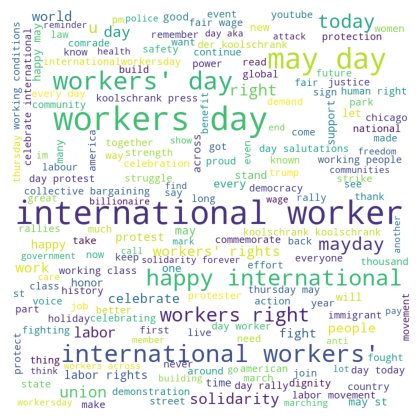

In [61]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

plt.savefig('Corpus Posts - Labor.png',dpi=500)
plt.show()

### 2.6 Looking at the Posts That Mentioned Both Climate Change and Workers Rights

In [62]:
both_data = pd.read_csv(r"C:\Users\natal\OneDrive\university\research\labor day\Sample of Both.csv")

In [65]:
posts = set(both_data['text'].to_list())

In [67]:
len(posts)

15

In [70]:
both_data['Avg. Compound Sentiment'] = both_data['clean text'].apply(lambda x: compound_sentiment(x))

In [72]:
both_data['Sentiment Label'] = both_data['Avg. Compound Sentiment'].apply(lambda x: sentiment_labeler(x))
both_data['Sentiment Label'].value_counts()

Sentiment Label
Positive    9
Negative    4
Neutral     2
Name: count, dtype: int64

In [ ]:
for post in posts:
    print ("-------------------\n")
    print (post)